PENTING: Upload file '_features.npy' (Data Coulomb Matrix asli)
Contoh: enol_gas_features.npy


Saving enol_gas.npy to enol_gas.npy

Berhasil memuat data: (103, 2209)
Sedang menghitung PCA...
Selesai! PCA menangkap 50.27% variansi data.


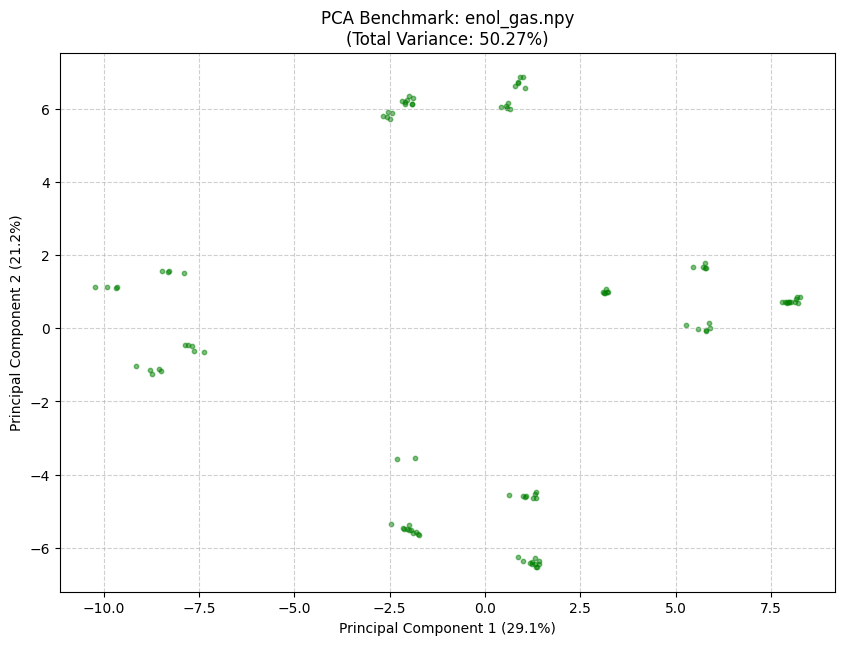

Gambar plot PCA disimpan: enol_gas_pca_plot.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from google.colab import files

# --- 1. UPLOAD FILE FITUR (.NPY) ---
print("PENTING: Upload file '_features.npy' (Data Coulomb Matrix asli)")
print("Contoh: enol_gas_features.npy")
uploaded = files.upload()

for nama_file in uploaded.keys():
    # --- 2. LOAD DATA ---
    X = np.load(nama_file)
    print(f"\nBerhasil memuat data: {X.shape}")

    # --- 3. JALANKAN PCA ---
    print("Sedang menghitung PCA...")

    # PCA jauh lebih cepat daripada t-SNE
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Menghitung Explained Variance Ratio
    # Ini memberi tahu berapa % informasi yang berhasil disimpan oleh 2 sumbu ini
    var_ratio = pca.explained_variance_ratio_
    total_var = np.sum(var_ratio) * 100
    print(f"Selesai! PCA menangkap {total_var:.2f}% variansi data.")

    # --- 4. VISUALISASI PLOT PCA ---
    plt.figure(figsize=(10, 7))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c='green', alpha=0.5, s=10)

    plt.title(f'PCA Benchmark: {nama_file}\n(Total Variance: {total_var:.2f}%)')
    plt.xlabel(f'Principal Component 1 ({var_ratio[0]*100:.1f}%)')
    plt.ylabel(f'Principal Component 2 ({var_ratio[1]*100:.1f}%)')
    plt.grid(True, linestyle='--', alpha=0.6)

    # Simpan gambar plot
    nama_plot = nama_file.replace(".npy", "_pca_plot.png")
    plt.savefig(nama_plot, dpi=300)
    plt.show()

    # --- 5. SIMPAN DATA PCA (Opsional) ---
    nama_data_pca = nama_file.replace(".npy", "_pca_2d.npy")
    np.save(nama_data_pca, X_pca)

    print(f"Gambar plot PCA disimpan: {nama_plot}")
    files.download(nama_plot)